## Coast Train metadata plots: class distribution

Daniel Buscombe, Marda Science contracted to U.S Geological Survey Pacific Coastal and Marine Science Center

January, 2022


These plots describe the Coast Train "v1" dataset


Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read data

In [2]:
A = pd.read_csv('metadata/A_naip_meta_served.csv')
B = pd.read_csv('metadata/B_quads_gulf_meta_served.csv')
C = pd.read_csv('metadata/C_s2_meta_served.csv')
D = pd.read_csv('metadata/D_s2_4classes_meta_served.csv')
E = pd.read_csv('metadata/E_L8_meta_all_served.csv')
F = pd.read_csv('metadata/F_elwha_l8_served.csv')
G = pd.read_csv('metadata/G_madeira_meta_served.csv')
H = pd.read_csv('metadata/H_dauphin_meta_served.csv')
I = pd.read_csv('metadata/I_sandwich_metadata_served.csv')
J = pd.read_csv('metadata/J_naip_6class_meta_served.csv')

Define a list of dataset names

In [37]:
names = [
    'A: NAIP',
    'B: Quads',
    'C: S2',
    'D: S2-4class',
    'E: Landsat-8',
    'F: Landsat-8-Elwha',
    'G: Madeira',
    'H: Dauphin',
    'I: Sandwich-8',
    'I: Sandwich-11',
    'J: NAIP-6class'
]

Cycle through each dataset and plot the number of images that contain each class

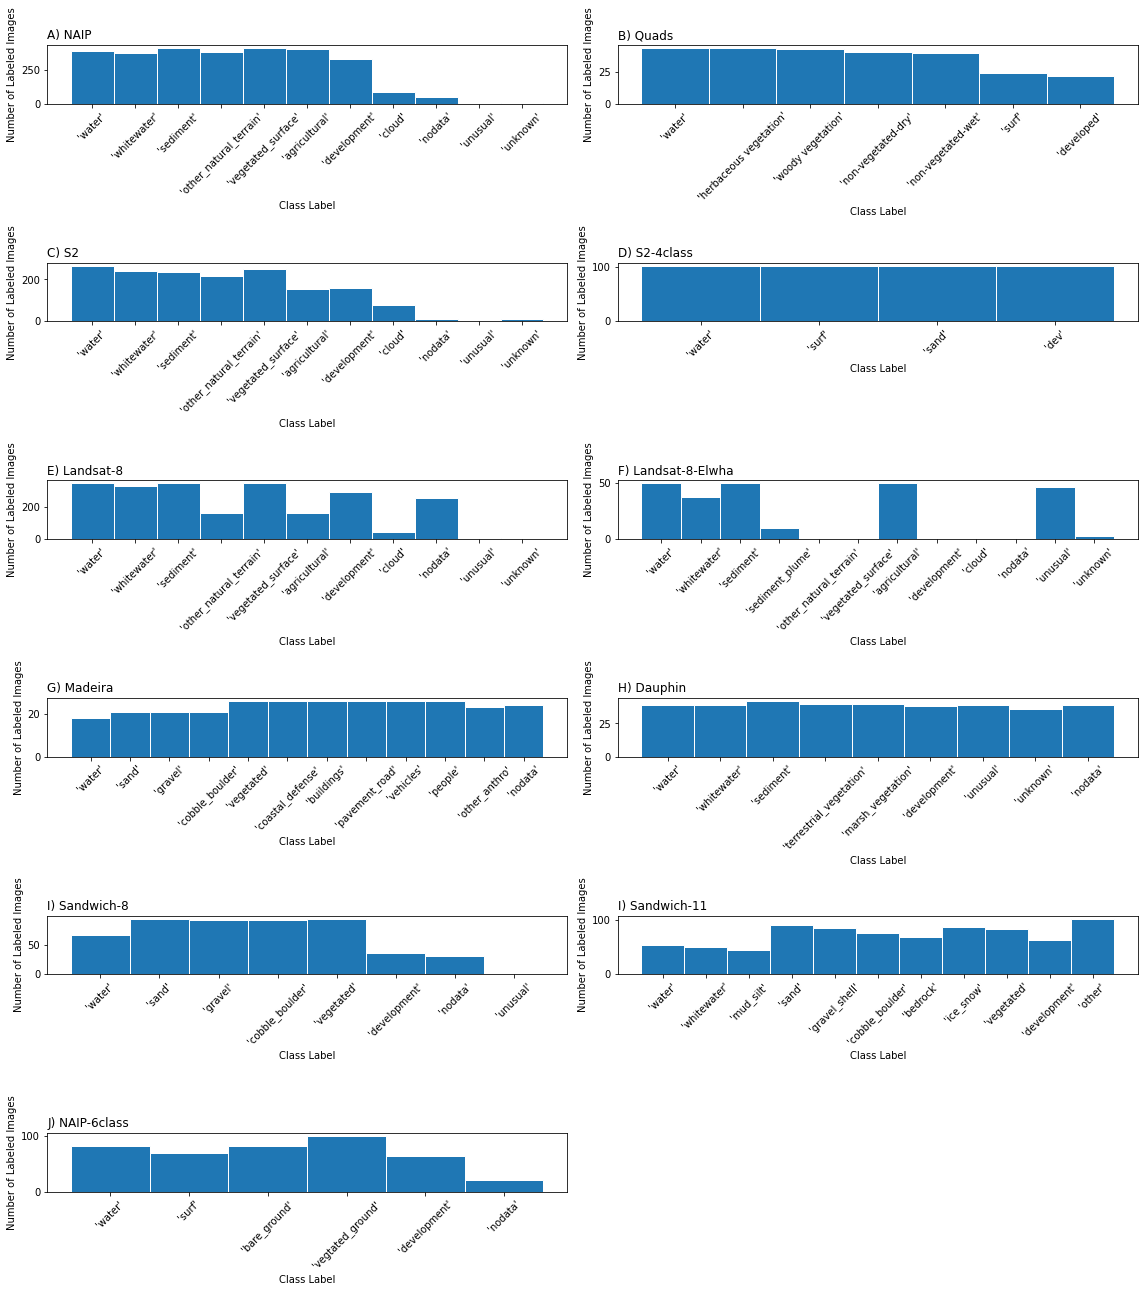

In [43]:
plt.rcParams["figure.autolayout"] = True

C_per_set = []

plt.figure(figsize=(16,18))
# plt.subplots_adjust(hspace=0.5)
for counter,(dat,name) in enumerate(zip([A,B,C,D,E,F,G,H,I[:99],I[99:],J], names)):
 
    classes = dat['classes_array'].values
    classes = [c.strip() for c in classes[0].split(',')]
    all = dat['classes_present_integer'].values
    
    classes_present = []
    for tmp in all:
        tmp = tmp.split(',')
        classes_present.append(np.array(tmp, 'int'))
        
    i = np.hstack(classes_present)
    n_bins = dat['num_classes'].values[0]

    C_per_set.append([classes[item] for item in i])
    
    plt.subplot(6,2,counter+1)
    n, bins, patches = plt.hist(i, bins=n_bins,  edgecolor='white', linewidth=1)
    ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
    #ticklabels = [i for i in range(1,n_bins+1)]
    plt.xticks(ticks, classes, rotation=45)
#     if counter==8:
    plt.ylabel('Number of Labeled Images')
    plt.xlabel('Class Label')
    plt.title(name.replace(':',')'), loc='left')
    
plt.savefig('Num_images_per_datarecord_containing_class.png',dpi=200, bbox_inches='tight')    

## Merge classes and enumerate merged classes

All the unique class labels in the dataset

In [71]:
uniq_classes = np.unique(np.hstack(C_per_set))

print(len(uniq_classes))

print(sorted(uniq_classes))

38
["'agricultural'", "'bare_ground'", "'bedrock'", "'buildings'", "'cloud'", "'coastal_defense'", "'cobble_boulder'", "'dev'", "'developed'", "'development'", "'gravel'", "'gravel_shell'", "'herbaceous vegetation'", "'ice_snow'", "'marsh_vegetation'", "'mud_silt'", "'nodata'", "'non-vegetated-dry'", "'non-vegetated-wet'", "'other'", "'other_anthro'", "'other_natural_terrain'", "'pavement_road'", "'people'", "'sand'", "'sediment'", "'sediment_plume'", "'surf'", "'terrestrial_vegetation'", "'unknown'", "'unusual'", "'vegetated'", "'vegetated_surface'", "'vegtated_ground'", "'vehicles'", "'water'", "'whitewater'", "'woody vegetation'"]


Define super classes and make a remapping to integer

In [101]:
# common_classes = ['water', 'whitewater']

super_classes = ['water', 'whitewater', 'sediment','developed', 'vegetation','natural_terrain', 'other']

super_integers = np.arange(1,len(super_classes)+1)

remap_super = dict(zip(super_classes, super_integers))

remap_super

{'water': 1,
 'whitewater': 2,
 'sediment': 3,
 'developed': 4,
 'vegetation': 5,
 'natural_terrain': 6,
 'other': 7}

Define all aliases, one per unique class --> superclass

In [102]:
aliases = {
    'water': 'water',
    'sediment_plume': 'water',
    'whitewater': 'whitewater',
    'surf':'whitewater',
    'sediment': 'sediment',
    'sand':'sediment', 
    'gravel':'sediment',
    'gravel_shell': 'sediment',
    'cobble_boulder': 'sediment',
    'mud_silt': 'sediment',
    'developed': 'developed',
    'dev':'developed',
    'coastal_defense':'developed',
    'pavement_road': 'developed',
    'other_anthro': 'developed',
    'vehicles': 'developed',
    'development':'developed',
    'buildings':'developed',  
    'other_natural_terrain': 'natural_terrain',
    'bare_ground':'natural_terrain',
    'bedrock':'natural_terrain',
    'non-vegetated-wet':'natural_terrain',
    'non-vegetated-dry':'natural_terrain',
    'agricultural':'natural_terrain',
    'bare_ground':'natural_terrain', 
    'vegetated':'vegetation',    
    'vegetated_surface':'vegetation',
    'vegtated_ground':'vegetation',
    'terrestrial_vegetation':'vegetation',
    'marsh_vegetation':'vegetation',
    'herbaceous vegetation':'vegetation',
    'woody vegetation':'vegetation',
    'unknown':'other',
    'unusual':'other',
    'nodata':'other',
    'people': 'other',
    'ice_snow': 'other',
    'cloud': 'other',
    'other':'other'
}

In [103]:
len(aliases)

38

In [104]:
# sorted(aliases.keys())

Plot number of images per recoded superclass per dataset

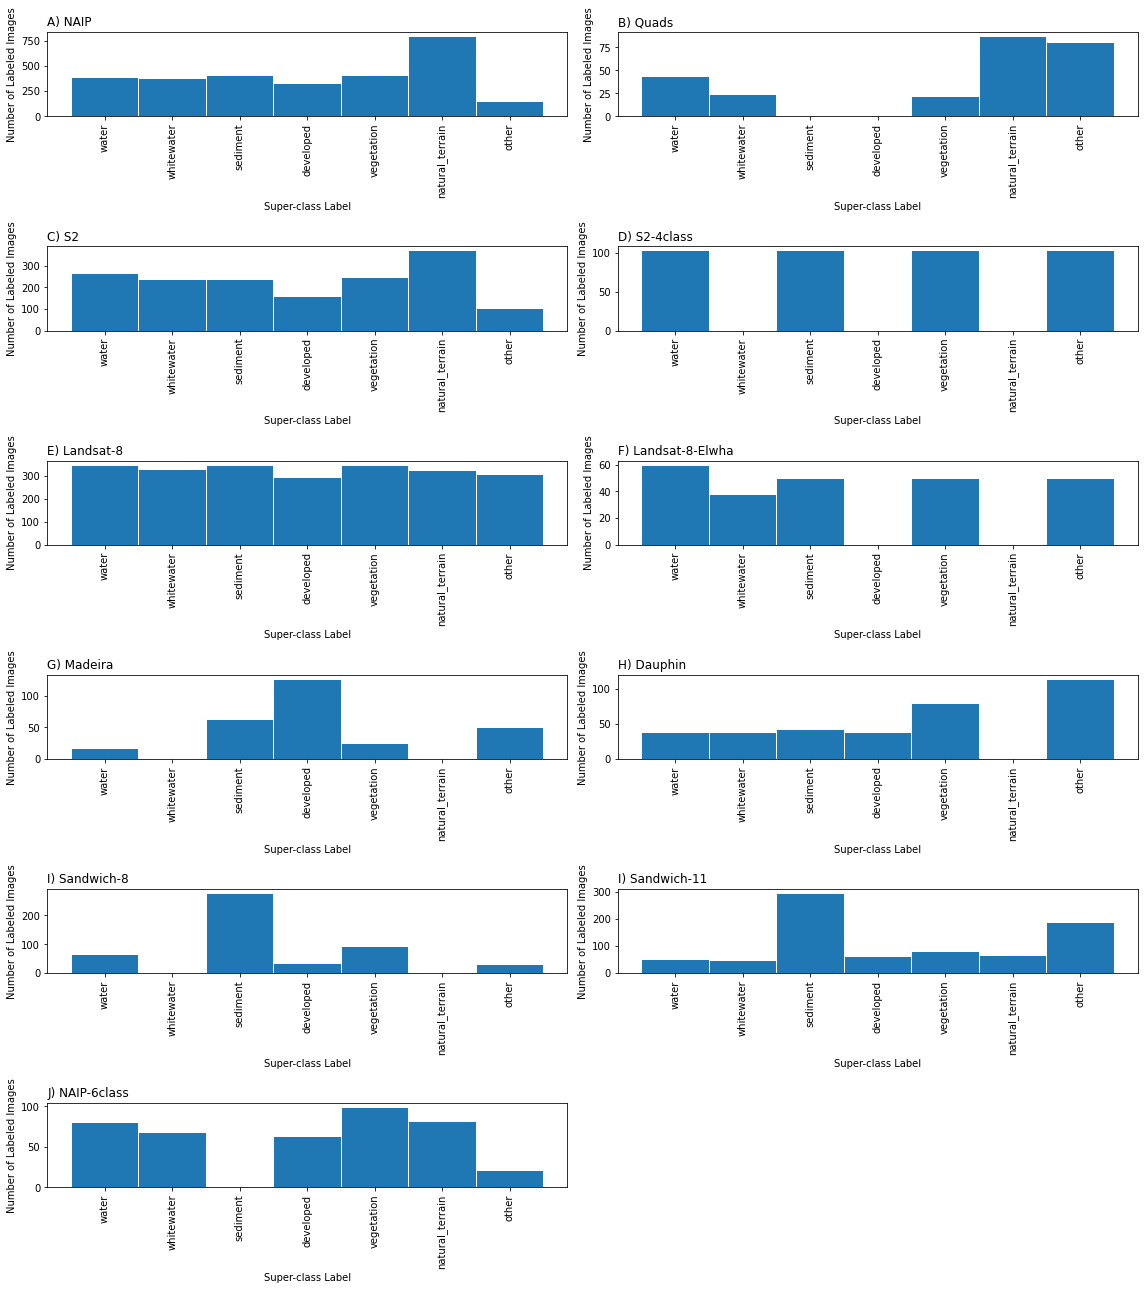

In [117]:
plt.rcParams["figure.autolayout"] = True

S_per_set = []

plt.figure(figsize=(16,18))

for counter,(dat,name) in enumerate(zip([A,B,C,D,E,F,G,H,I[:99],I[99:],J], names)):

    classes = dat['classes_array'].values
    classes = [c.strip() for c in classes[0].split(',')]
    all = dat['classes_present_integer'].values

    classes_present = []
    for tmp in all:
        tmp = tmp.split(',')
        classes_present.append(np.array(tmp, 'int'))

    i = np.hstack(classes_present)

    classes_present_string = [classes[item].strip("'") for item in i]

    recoded = [aliases[i] for i in classes_present_string]

    recoded_integer = [remap_super[i] for i in recoded]

    i = np.hstack(recoded_integer)
    
    S_per_set.append(i)
    n_bins = len(remap_super)

    plt.subplot(6,2,counter+1)
    n, bins, patches = plt.hist(i, bins=n_bins,  edgecolor='white', linewidth=1)
    ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
    plt.xticks(ticks, super_classes, rotation=90)
    #     if counter==8:
    plt.ylabel('Number of Labeled Images')
    plt.xlabel('Super-class Label')
    plt.title(name.replace(':',')'), loc='left')

plt.savefig('Num_images_per_datarecord_containing_superclass.png',dpi=200, bbox_inches='tight')

In [112]:
all_superclasses_summed = [np.sum(np.hstack(S_per_set)==i) for i in super_integers]

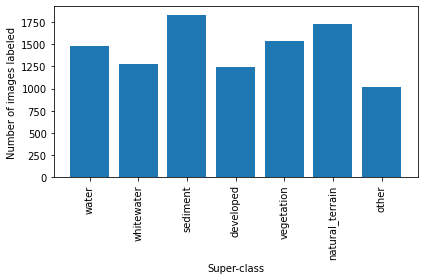

In [118]:
plt.bar(super_integers,all_superclasses_summed)
plt.xticks(super_integers, super_classes, rotation=90)
plt.xlabel('Super-class')
plt.ylabel('Number of images labeled')
plt.savefig('NumLabel_all_datarecords_per_superlabel.png',dpi=200, bbox_inches='tight')